# 1) Preprocessing the data (before loading into models)

<br>

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'alda_proj_mid (original).ipynb',
 'alda_proj_mid.ipynb',
 'alda_proj_mid2.ipynb',
 'CSC522_Project_Fall2021.pdf',
 'dot_traffic_2015.txt.gz',
 'dot_traffic_2015.txt.gz.zip',
 'dot_traffic_stations_2015.txt.gz',
 'dot_traffic_stations_2015.txt.gz.zip',
 'final_dataset.csv',
 'final_dataset_stations.csv',
 'final_data_without_labels.csv',
 'MidtermProject.pdf',
 'Midway_TrafficPrediction_P38.pdf',
 'P38_Project_Proposal.pdf',
 'Task 1 (only North Carolina).ipynb',
 'Task 1.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [4]:
df = pd.read_csv("dot_traffic_2015.txt.gz", header=0, sep=',', quotechar='"')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   date                                       object 
 1   day_of_data                                int64  
 2   day_of_week                                int64  
 3   direction_of_travel                        int64  
 4   direction_of_travel_name                   object 
 5   fips_state_code                            int64  
 6   functional_classification                  object 
 7   functional_classification_name             object 
 8   lane_of_travel                             int64  
 9   month_of_data                              int64  
 10  record_type                                int64  
 11  restrictions                               float64
 12  station_id                                 object 
 13  traffic_volume_counted_after_0000_to_0100 

In [5]:
df.columns

Index(['date', 'day_of_data', 'day_of_week', 'direction_of_travel',
       'direction_of_travel_name', 'fips_state_code',
       'functional_classification', 'functional_classification_name',
       'lane_of_travel', 'month_of_data', 'record_type', 'restrictions',
       'station_id', 'traffic_volume_counted_after_0000_to_0100',
       'traffic_volume_counted_after_0100_to_0200',
       'traffic_volume_counted_after_0200_to_0300',
       'traffic_volume_counted_after_0300_to_0400',
       'traffic_volume_counted_after_0400_to_0500',
       'traffic_volume_counted_after_0500_to_0600',
       'traffic_volume_counted_after_0600_to_0700',
       'traffic_volume_counted_after_0700_to_0800',
       'traffic_volume_counted_after_0800_to_0900',
       'traffic_volume_counted_after_0900_to_1000',
       'traffic_volume_counted_after_1000_to_1100',
       'traffic_volume_counted_after_1100_to_1200',
       'traffic_volume_counted_after_1200_to_1300',
       'traffic_volume_counted_after_1300_to_

In [6]:
df.drop(['day_of_data','functional_classification_name','direction_of_travel_name','record_type','restrictions',
         'year_of_data','date','day_of_week','direction_of_travel','lane_of_travel','month_of_data'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 27 columns):
 #   Column                                     Dtype 
---  ------                                     ----- 
 0   fips_state_code                            int64 
 1   functional_classification                  object
 2   station_id                                 object
 3   traffic_volume_counted_after_0000_to_0100  int64 
 4   traffic_volume_counted_after_0100_to_0200  int64 
 5   traffic_volume_counted_after_0200_to_0300  int64 
 6   traffic_volume_counted_after_0300_to_0400  int64 
 7   traffic_volume_counted_after_0400_to_0500  int64 
 8   traffic_volume_counted_after_0500_to_0600  int64 
 9   traffic_volume_counted_after_0600_to_0700  int64 
 10  traffic_volume_counted_after_0700_to_0800  int64 
 11  traffic_volume_counted_after_0800_to_0900  int64 
 12  traffic_volume_counted_after_0900_to_1000  int64 
 13  traffic_volume_counted_after_1000_to_1100  int64 
 14  tr

In [7]:
df_sum=df.groupby(['fips_state_code','functional_classification','station_id'],as_index=False).agg('sum')
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6923 entries, 0 to 6922
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   fips_state_code                            6923 non-null   int64 
 1   functional_classification                  6923 non-null   object
 2   station_id                                 6923 non-null   object
 3   traffic_volume_counted_after_0000_to_0100  6923 non-null   int64 
 4   traffic_volume_counted_after_0100_to_0200  6923 non-null   int64 
 5   traffic_volume_counted_after_0200_to_0300  6923 non-null   int64 
 6   traffic_volume_counted_after_0300_to_0400  6923 non-null   int64 
 7   traffic_volume_counted_after_0400_to_0500  6923 non-null   int64 
 8   traffic_volume_counted_after_0500_to_0600  6923 non-null   int64 
 9   traffic_volume_counted_after_0600_to_0700  6923 non-null   int64 
 10  traffic_volume_counted_after_0700_to

In [8]:
df_mean=df.groupby(['fips_state_code','functional_classification','station_id'],as_index=False).agg('mean')
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6923 entries, 0 to 6922
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   fips_state_code                            6923 non-null   int64  
 1   functional_classification                  6923 non-null   object 
 2   station_id                                 6923 non-null   object 
 3   traffic_volume_counted_after_0000_to_0100  6923 non-null   float64
 4   traffic_volume_counted_after_0100_to_0200  6923 non-null   float64
 5   traffic_volume_counted_after_0200_to_0300  6923 non-null   float64
 6   traffic_volume_counted_after_0300_to_0400  6923 non-null   float64
 7   traffic_volume_counted_after_0400_to_0500  6923 non-null   float64
 8   traffic_volume_counted_after_0500_to_0600  6923 non-null   float64
 9   traffic_volume_counted_after_0600_to_0700  6923 non-null   float64
 10  traffic_volume_counted_a

In [9]:
df_stations = pd.read_csv("dot_traffic_stations_2015.txt.gz", header=0, sep=',', quotechar='"')
cols = df_stations[['latitude','longitude','national_highway_system','station_id','fips_state_code']]
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28466 entries, 0 to 28465
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitude                 28465 non-null  float64
 1   longitude                28465 non-null  float64
 2   national_highway_system  28466 non-null  object 
 3   station_id               28466 non-null  object 
 4   fips_state_code          28466 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [10]:
df_mean_latlong = df_mean.merge(cols, on=['station_id','fips_state_code'], how='inner')
df_mean_latlong.drop_duplicates(inplace=True)
df_mean_latlong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7300 entries, 0 to 22970
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   fips_state_code                            7300 non-null   int64  
 1   functional_classification                  7300 non-null   object 
 2   station_id                                 7300 non-null   object 
 3   traffic_volume_counted_after_0000_to_0100  7300 non-null   float64
 4   traffic_volume_counted_after_0100_to_0200  7300 non-null   float64
 5   traffic_volume_counted_after_0200_to_0300  7300 non-null   float64
 6   traffic_volume_counted_after_0300_to_0400  7300 non-null   float64
 7   traffic_volume_counted_after_0400_to_0500  7300 non-null   float64
 8   traffic_volume_counted_after_0500_to_0600  7300 non-null   float64
 9   traffic_volume_counted_after_0600_to_0700  7300 non-null   float64
 10  traffic_volume_counted_

In [11]:
df_mean_latlong = df_mean_latlong.drop_duplicates(subset=['fips_state_code','station_id'])
df_mean_latlong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6904 entries, 0 to 22970
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   fips_state_code                            6904 non-null   int64  
 1   functional_classification                  6904 non-null   object 
 2   station_id                                 6904 non-null   object 
 3   traffic_volume_counted_after_0000_to_0100  6904 non-null   float64
 4   traffic_volume_counted_after_0100_to_0200  6904 non-null   float64
 5   traffic_volume_counted_after_0200_to_0300  6904 non-null   float64
 6   traffic_volume_counted_after_0300_to_0400  6904 non-null   float64
 7   traffic_volume_counted_after_0400_to_0500  6904 non-null   float64
 8   traffic_volume_counted_after_0500_to_0600  6904 non-null   float64
 9   traffic_volume_counted_after_0600_to_0700  6904 non-null   float64
 10  traffic_volume_counted_

In [12]:
labels = []
for i in df_mean_latlong['functional_classification']:
    if 'U' in i:
        labels.append('U')
    else:
        labels.append('R')
        
print(labels)

['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'R', 'R', 'U', 'U', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'U', 'U',

In [13]:
df_mean_latlong.drop(['functional_classification','station_id'], axis=1, inplace=True)
df_mean_latlong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6904 entries, 0 to 22970
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   fips_state_code                            6904 non-null   int64  
 1   traffic_volume_counted_after_0000_to_0100  6904 non-null   float64
 2   traffic_volume_counted_after_0100_to_0200  6904 non-null   float64
 3   traffic_volume_counted_after_0200_to_0300  6904 non-null   float64
 4   traffic_volume_counted_after_0300_to_0400  6904 non-null   float64
 5   traffic_volume_counted_after_0400_to_0500  6904 non-null   float64
 6   traffic_volume_counted_after_0500_to_0600  6904 non-null   float64
 7   traffic_volume_counted_after_0600_to_0700  6904 non-null   float64
 8   traffic_volume_counted_after_0700_to_0800  6904 non-null   float64
 9   traffic_volume_counted_after_0800_to_0900  6904 non-null   float64
 10  traffic_volume_counted_

In [14]:
df_mean_latlong.to_csv('final_data_without_labels.csv', index=False)

df_norm = df_mean_latlong.drop(['national_highway_system'],axis=1, inplace=False)
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6904 entries, 0 to 22970
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   fips_state_code                            6904 non-null   int64  
 1   traffic_volume_counted_after_0000_to_0100  6904 non-null   float64
 2   traffic_volume_counted_after_0100_to_0200  6904 non-null   float64
 3   traffic_volume_counted_after_0200_to_0300  6904 non-null   float64
 4   traffic_volume_counted_after_0300_to_0400  6904 non-null   float64
 5   traffic_volume_counted_after_0400_to_0500  6904 non-null   float64
 6   traffic_volume_counted_after_0500_to_0600  6904 non-null   float64
 7   traffic_volume_counted_after_0600_to_0700  6904 non-null   float64
 8   traffic_volume_counted_after_0700_to_0800  6904 non-null   float64
 9   traffic_volume_counted_after_0800_to_0900  6904 non-null   float64
 10  traffic_volume_counted_

In [15]:
from sklearn import preprocessing

x = df_norm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_after_norm = pd.DataFrame(x_scaled)

In [16]:
df_after_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,...,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000,6904.000000
mean,0.543943,0.016845,0.011213,0.009241,0.009524,0.015974,0.032993,0.057427,0.077188,0.078877,...,0.095197,0.089777,0.084014,0.073333,0.069288,0.061927,0.049955,0.026133,0.389068,0.098011
std,0.312638,0.033164,0.024167,0.021316,0.021934,0.035722,0.066685,0.100136,0.122131,0.124126,...,0.135942,0.129433,0.128655,0.117216,0.113510,0.106428,0.090008,0.048423,0.062563,0.068062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.001775,0.001111,0.000898,0.000965,0.001702,0.003837,0.007614,0.011894,0.012435,...,0.017504,0.015964,0.013812,0.011446,0.010317,0.008364,0.006035,0.002916,0.350194,0.079313
50%,0.581818,0.005390,0.003397,0.002673,0.002767,0.004745,0.010326,0.020273,0.030980,0.032273,...,0.044482,0.041200,0.036343,0.030441,0.027992,0.023721,0.017962,0.008860,0.390636,0.088825
75%,0.854545,0.017156,0.011191,0.009023,0.009116,0.014338,0.030211,0.057876,0.082624,0.084258,...,0.107348,0.100895,0.093047,0.079270,0.073522,0.064575,0.051888,0.027634,0.428919,0.109129
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
print(len(labels))
print((len(df_after_norm)))

6904
6904


<br>

<br>

## Split 1

* Training - 80%
* Test - 20%

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_after_norm, labels, test_size=0.2, random_state=42)

<br>

### Model 1 - KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_accuracy = 0.0
j = 0
neighbors = []
acc_list = []
for i in range(5,76,5):
    model = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    model.fit(X_train, y_train)
    
    predicted_labels = model.predict(X_test)
    acc = accuracy_score(y_test, predicted_labels)
    
    acc_list.append(acc)
    neighbors.append(i)
    
    if (acc > best_accuracy):
        best_accuracy=acc
        j=i
    
    print('Number of neighbors : {} \t Accuracy : {} '.format(i, acc))

print('\n')
print('The best accuracy is {} for a KNN model with {} number of neighbors'.format(best_accuracy, j))

Number of neighbors : 5 	 Accuracy : 0.7871107892831282 
Number of neighbors : 10 	 Accuracy : 0.7936278059377263 
Number of neighbors : 15 	 Accuracy : 0.7907313540912382 
Number of neighbors : 20 	 Accuracy : 0.7863866763215062 
Number of neighbors : 25 	 Accuracy : 0.7907313540912382 
Number of neighbors : 30 	 Accuracy : 0.7849384503982622 
Number of neighbors : 35 	 Accuracy : 0.7885590152063722 
Number of neighbors : 40 	 Accuracy : 0.7856625633598842 
Number of neighbors : 45 	 Accuracy : 0.7878349022447502 
Number of neighbors : 50 	 Accuracy : 0.782041998551774 
Number of neighbors : 55 	 Accuracy : 0.7849384503982622 
Number of neighbors : 60 	 Accuracy : 0.782766111513396 
Number of neighbors : 65 	 Accuracy : 0.7711803041274439 
Number of neighbors : 70 	 Accuracy : 0.7740767559739319 
Number of neighbors : 75 	 Accuracy : 0.7740767559739319 


The best accuracy is 0.7936278059377263 for a KNN model with 10 number of neighbors


<br>

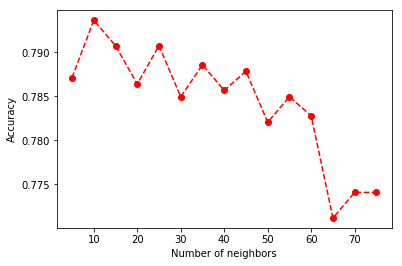

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(neighbors, acc_list, 'ro--')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

<br>

### Model 2 - SVM

In [26]:
from sklearn import svm

svm1 = svm.SVC()
svm1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
pred_SVM = svm1.predict(X_test)
acc_SVM1 = accuracy_score(y_test, pred_SVM)

print('The best accuracy for the SVM model is {}'.format(acc_SVM1))

The best accuracy for the SVM model is 0.6965966690803765


<br>

### Model 3 - Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

nb1 = GaussianNB()
nb1.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred = nb1.predict(X_test)

print('{} number of misclassified data points from a total of {} points'.format((y_pred!=y_test).sum(), len(y_test)))

501 number of misclassified data points from a total of 1381 points


In [50]:
from sklearn import metrics

acc_nb1 = metrics.accuracy_score(y_test, y_pred)
print("The best accuracy for the Naive Bayes model is", acc_nb1)

The best accuracy for the Naive Bayes model is 0.6372194062273715


<br>

### Model 4 - Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt_gini_1 = DecisionTreeClassifier()
dt_gini_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
y_pred = dt_gini_1.predict(X_test)
acc_dt_gini1 = metrics.accuracy_score(y_test, y_pred)

print('Accuracy for the Decision Tree (with Gini Index) is', acc_dtgini1)

Accuracy for the Decision Tree (with Gini Index) is 0.7566980448950036


<br>

In [72]:
dt_entropy_1 = DecisionTreeClassifier(criterion='entropy')
dt_entropy_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
y_pred = dt_entropy_1.predict(X_test)
acc_dt_entropy1 = metrics.accuracy_score(y_test, y_pred)

print('Accuracy for the Decision Tree (with entropy) is', acc_dt_entropy1)

Accuracy for the Decision Tree (with entropy) is 0.7733526430123099


<br>

In [74]:
acc_DT1 = 0

if acc_dt_entropy1 > acc_dt_gini1:
    acc_DT1 = acc_dt_entropy1
    
else:
    acc_DT1 = acc_dt_gini1
    
print('The best accuracy for the Decision Tree is', acc_DT1)

The best accuracy for the Decision Tree is 0.7733526430123099


<br>

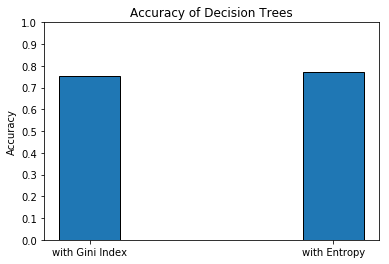

In [78]:
DT = ['with Gini Index', 'with Entropy']
DT_acc = [acc_dt_gini1, acc_dt_entropy1]

plt.title('Accuracy of Decision Trees')
plt.bar(DT, DT_acc, width=0.25, edgecolor='k')

plt.ylabel('Accuracy')
plt.yticks(ticks=[x * 0.1 for x in range(11)])

plt.show()

<br>

<br>

### Comparing the models

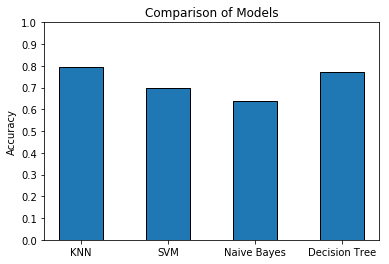

In [79]:
Models = ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree']

Accuracy = [best_accuracy, acc_SVM1, acc_nb1, acc_DT1]

plt.title('Comparison of Models')
plt.bar(Models, Accuracy, width=0.50, edgecolor='k')

plt.ylabel('Accuracy')
plt.yticks(ticks=[x * 0.10 for x in range(11)])

plt.show()

<br>

<br>

## Split 2

* Training 70%
* Validation 15%
* Test 15%

In [80]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_after_norm, labels, test_size=0.15, random_state=42)
X_train2_val_split, X_val, y_train2_val_split, y_val = train_test_split(X_train2, y_train2, test_size=0.15/0.85, random_state=42)

In [81]:
print(len(X_train2))

# 15% test split
print(len(X_test2))

# 70% train split
print(len(X_train2_val_split))

# 15% validation split
print(len(X_val))

5868
1036
4832
1036


<br>

### Model 1 - KNN

In [85]:
neighbors2 = []
acc_list2 = []
val_acc_list2 = []
best_accuracy2 = 0.0
j = 0

for i in range(5,76,5):
    model2 = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    model2.fit(X_train2_val_split, y_train2_val_split)
    
    val_pred = model2.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    
    predicted_labels = model2.predict(X_test2)
    acc = accuracy_score(y_test2, predicted_labels)
    
    acc_list2.append(acc)
    neighbors2.append(i)
    val_acc_list2.append(val_acc)
    
    if (acc > best_accuracy2):
        best_accuracy2=acc
        j=i
    
    print('Number of neighbors : {} \t Validation Accuracy : {} \t Accuracy : {}'.format(i, val_acc, acc))

print('\n')
print('The best accuracy is {} for a KNN model with {} number of neighbors'.format(best_accuracy2, j))

Number of neighbors : 5 	 Validation Accuracy : 0.7837837837837838 	 Accuracy : 0.803088803088803
Number of neighbors : 10 	 Validation Accuracy : 0.7577220077220077 	 Accuracy : 0.8088803088803089
Number of neighbors : 15 	 Validation Accuracy : 0.7712355212355212 	 Accuracy : 0.805019305019305
Number of neighbors : 20 	 Validation Accuracy : 0.7577220077220077 	 Accuracy : 0.7982625482625483
Number of neighbors : 25 	 Validation Accuracy : 0.7722007722007722 	 Accuracy : 0.7953667953667953
Number of neighbors : 30 	 Validation Accuracy : 0.7673745173745173 	 Accuracy : 0.8001930501930502
Number of neighbors : 35 	 Validation Accuracy : 0.7722007722007722 	 Accuracy : 0.7915057915057915
Number of neighbors : 40 	 Validation Accuracy : 0.7683397683397684 	 Accuracy : 0.7944015444015444
Number of neighbors : 45 	 Validation Accuracy : 0.7606177606177607 	 Accuracy : 0.7934362934362934
Number of neighbors : 50 	 Validation Accuracy : 0.7548262548262549 	 Accuracy : 0.7934362934362934
Num

<br>

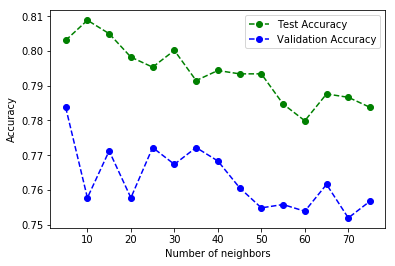

In [86]:
plt.plot(neighbors2, acc_list2, 'go--')
plt.plot(neighbors2, val_acc_list2, 'bo--')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend(['Test Accuracy', 'Validation Accuracy'], loc=0)
plt.show()

<br>

### Model 2 - SVM

In [104]:
svm2 = svm.SVC()
svm2.fit(X_train2_val_split, y_train2_val_split)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [105]:
pred_SVM_val = svm2.predict(X_val)
acc_SVM_val = accuracy_score(y_val, pred_SVM_val)
acc_SVM_val

0.6698841698841699

In [106]:
pred_SVM_test = svm2.predict(X_test2)
acc_SVM2 = accuracy_score(y_test2, pred_SVM_test)

print("The best accuracy for the SVM model is", acc_SVM2)

The best accuracy for the SVM model is 0.7084942084942085


<br>

### Model 3 - Naive Bayes

In [100]:
nb2 = GaussianNB()
nb2.fit(X_train2_val_split, y_train2_val_split)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
pred_NB_val = nb2.predict(X_val)
acc_NB_val = accuracy_score(y_val, pred_NB_val)
acc_NB_val

0.612934362934363

In [103]:
pred_NB_test = nb2.predict(X_test2)
acc_NB2 = accuracy_score(y_test2, pred_NB_test)

print("The best accuracy for the Naive Bayes model is", acc_NB2)

The best accuracy for the Naive Bayes model is 0.6486486486486487


<br>

### Model 4 - Decision Trees

In [96]:
dt_gini_2 = DecisionTreeClassifier()
dt_gini_2.fit(X_train2_val_split, y_train2_val_split)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
pred_dtgini_val = dt_gini_2.predict(X_val)
acc_dtgini_val = accuracy_score(y_val, pred_dtgini_val)
acc_dtgini_val

0.7461389961389961

In [99]:
pred_dtgini_test = dt_gini_2.predict(X_test2)
acc_dt_gini2 = accuracy_score(y_test2, pred_dtgini_test)

print('Accuracy for the Decision Tree (with Gini Index) is', acc_dtgini1)

Accuracy for the Decision Tree (with Gini Index) is 0.7566980448950036


<br>

In [107]:
dt_entropy_2 = DecisionTreeClassifier(criterion='entropy')
dt_entropy_2.fit(X_train2_val_split, y_train2_val_split)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
pred_dtentropy_val = dt_entropy_2.predict(X_val)
acc_dtentropy_val = accuracy_score(y_val, pred_dtentropy_val)
acc_dtentropy_val

0.7393822393822393

In [110]:
pred_dtentropy_test = dt_entropy_2.predict(X_test2)
acc_dt_entropy2 = accuracy_score(y_test2, pred_dtentropy_test)

print('Accuracy for the Decision Tree (with Entropy) is', acc_dt_entropy2)

Accuracy for the Decision Tree (with Entropy) is 0.7828185328185329


<br>

In [111]:
acc_DT2 = 0

if acc_dt_entropy2 > acc_dt_gini2:
    acc_DT2 = acc_dt_entropy2
    
else:
    acc_DT2 = acc_dt_gini2
    
print('The best accuracy for the Decision Tree is', acc_DT2)

The best accuracy for the Decision Tree is 0.7828185328185329


<br>

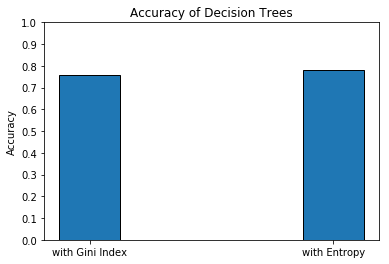

In [112]:
DT = ['with Gini Index', 'with Entropy']
DT_acc = [acc_dt_gini2, acc_dt_entropy2]

plt.title('Accuracy of Decision Trees')
plt.bar(DT, DT_acc, width=0.25, edgecolor='k')

plt.ylabel('Accuracy')
plt.yticks(ticks=[x * 0.1 for x in range(11)])

plt.show()

<br>

<br>

### Comparing the Models

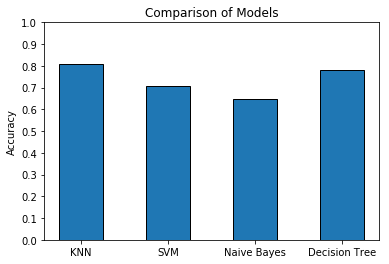

In [113]:
Models = ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree']

Accuracy = [best_accuracy2, acc_SVM2, acc_NB2, acc_DT2]

plt.title('Comparison of Models')
plt.bar(Models, Accuracy, width=0.50, edgecolor='k')

plt.ylabel('Accuracy')
plt.yticks(ticks=[x * 0.10 for x in range(11)])

plt.show()

<br>

<br>

## Split 3

* Include K-fold cross validation

In [115]:
from sklearn.model_selection import cross_val_score

<br>

### Model 1 - KNN

In [117]:
accuracy_cv = []
best_accuracy3 = 0.00
j=0
m=0
for n in range(5,76,5):
    
    print('For KNN with {} neighbors'.format(n))
    
    for i in range (2,11):

        model_knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
        acc_cv = cross_val_score(model_knn, df_after_norm, labels, scoring='accuracy', cv=i)
        acc_mean = acc_cv.mean()
        accuracy_cv.append(acc_mean)

        if(acc_mean > best_accuracy3):
            best_accuracy3 = acc_mean
            j = i
            m = n

        print('Number of folds : {} \t Accuracy {}'.format(i, acc_mean))
    print('\n')

print("\n")
print('The best accuracy is {} for KNN model with {} neighbors and {} folds'.format(best_accuracy3, m, j))

For KNN with 5 neighbors
Number of folds : 2 	 Accuracy 0.5603997682502897
Number of folds : 3 	 Accuracy 0.6025673957113536
Number of folds : 4 	 Accuracy 0.5941958493827783
Number of folds : 5 	 Accuracy 0.5705828549690841
Number of folds : 6 	 Accuracy 0.5687386775362319
Number of folds : 7 	 Accuracy 0.5475958087351346
Number of folds : 8 	 Accuracy 0.5408986193129388
Number of folds : 9 	 Accuracy 0.5307343489982156
Number of folds : 10 	 Accuracy 0.5472789540696856


For KNN with 10 neighbors
Number of folds : 2 	 Accuracy 0.578505214368482
Number of folds : 3 	 Accuracy 0.6001019907075132
Number of folds : 4 	 Accuracy 0.6008546276948381
Number of folds : 5 	 Accuracy 0.5978164251308977
Number of folds : 6 	 Accuracy 0.5848155696457327
Number of folds : 7 	 Accuracy 0.5600417208419841
Number of folds : 8 	 Accuracy 0.5532094817354711
Number of folds : 9 	 Accuracy 0.5611291170365315
Number of folds : 10 	 Accuracy 0.5800118426227939


For KNN with 15 neighbors
Number of folds : 

We get the best accuracy for KNN model with 45 neighbors and 2 folds

<br>

#### Since our baseline KNN model gave the most optimized answer with 10 neighbors, we will use that model to calculate the accuracy for K-fold Cross Validation (K=2 to K=10)

In [141]:
max_acc = 0
j = 0
Acc = []
Folds = []

for i in range (2,11):
    
    knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
    acc_cv = cross_val_score(model_knn, df_after_norm, labels, scoring='accuracy', cv=i)
    acc_mean = acc_cv.mean()
    Acc.append(acc_mean)
    Folds.append(i)
    
    print('Number of folds : {} \t Accuracy {}'.format(i, acc_mean))
    
    if(acc_mean > max_acc):
        max_acc = acc_mean
        j = i
        
print('\n')
print('The maximum accuracy for the baseline KNN model is {} with {} folds'.format(max_acc, j))

Number of folds : 2 	 Accuracy 0.7121958285052143
Number of folds : 3 	 Accuracy 0.6257379216560269
Number of folds : 4 	 Accuracy 0.6477639871436605
Number of folds : 5 	 Accuracy 0.6414110710719476
Number of folds : 6 	 Accuracy 0.6333245269726248
Number of folds : 7 	 Accuracy 0.6270466387149993
Number of folds : 8 	 Accuracy 0.6587556754202368
Number of folds : 9 	 Accuracy 0.6206539221045086
Number of folds : 10 	 Accuracy 0.6368991527185416


The maximum accuracy for the baseline KNN model is 0.7121958285052143 with 2 folds


<br>

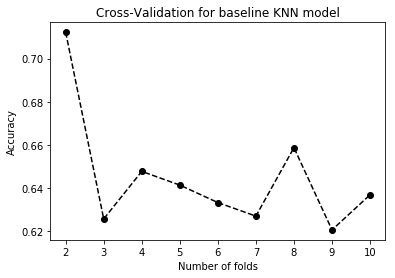

In [142]:
plt.plot(Folds, Acc, 'ko--')
plt.xlabel('Number of folds')
plt.ylabel('Accuracy')
plt.title('Cross-Validation for baseline KNN model')
plt.show()

<br>

### Model 2 - SVM

In [138]:
accuracy_cv = []
best_accuracy = 0.00
j = 0

for i in range (2,11):
    
    model_SVM = svm.SVC()
    acc_cv = cross_val_score(model_SVM, df_after_norm, labels, scoring='accuracy', cv=i)
    acc_mean = acc_cv.mean()
    accuracy_cv.append(acc_mean)
    
    if(acc_mean > best_accuracy):
        best_accuracy = acc_mean
        j = i
    
    print('Number of folds : {} \t Accuracy {}'.format(i, acc_mean))

print("\n")
print('The best accuracy is {} for SVM model with {} folds'.format(best_accuracy, j))

Number of folds : 2 	 Accuracy 0.6871378910776362
Number of folds : 3 	 Accuracy 0.6800376484216623
Number of folds : 4 	 Accuracy 0.6877089364987454
Number of folds : 5 	 Accuracy 0.6849500507246604
Number of folds : 6 	 Accuracy 0.6807565921900162
Number of folds : 7 	 Accuracy 0.6790041860378118
Number of folds : 8 	 Accuracy 0.684790977097639
Number of folds : 9 	 Accuracy 0.6842185330459494
Number of folds : 10 	 Accuracy 0.6858016051405214


The best accuracy is 0.6877089364987454 for SVM model with 4 folds


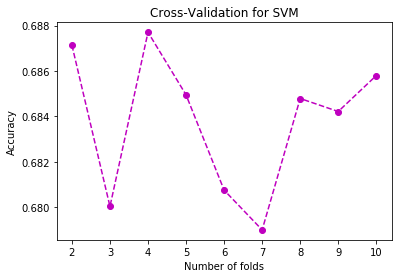

In [139]:
plt.plot(list(range(2,11)), accuracy_cv, 'mo--')
plt.xlabel('Number of folds')
plt.ylabel('Accuracy')
plt.title('Cross-Validation for SVM')
plt.show()

<br>

### Model 3 - Naive Bayes

In [136]:
accuracy_cv = []
best_accuracy = 0.00
j = 0

for i in range (2,11):
    
    model_NB = GaussianNB()
    acc_cv = cross_val_score(model_NB, df_after_norm, labels, scoring='accuracy', cv=i)
    acc_mean = acc_cv.mean()
    accuracy_cv.append(acc_mean)
    
    if(acc_mean > best_accuracy):
        best_accuracy = acc_mean
        j = i
    
    print('Number of folds : {} \t Accuracy {}'.format(i, acc_mean))

print("\n")
print('The best accuracy is {} for Naive Bayes model with {} folds'.format(best_accuracy, j))

Number of folds : 2 	 Accuracy 0.6336906141367323
Number of folds : 3 	 Accuracy 0.6293418451504048
Number of folds : 4 	 Accuracy 0.6265790555793325
Number of folds : 5 	 Accuracy 0.6255574583156649
Number of folds : 6 	 Accuracy 0.6242529690016103
Number of folds : 7 	 Accuracy 0.6226674750254352
Number of folds : 8 	 Accuracy 0.6241009919419578
Number of folds : 9 	 Accuracy 0.6243888787750043
Number of folds : 10 	 Accuracy 0.6293215748484414


The best accuracy is 0.6336906141367323 for Naive Bayes model with 2 folds


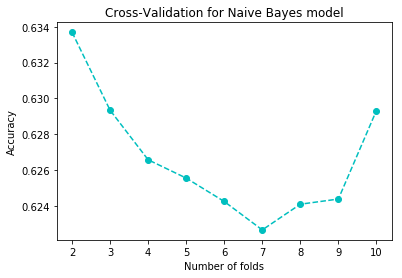

In [137]:
plt.plot(list(range(2,11)), accuracy_cv, 'co--')
plt.xlabel('Number of folds')
plt.ylabel('Accuracy')
plt.title('Cross-Validation for Naive Bayes model')
plt.show()

<br>

### Model 4 - Decision Trees

In [131]:
accuracy_cv = []
best_accuracy = 0.00
j = 0

for i in range (2,11):
    
    model_DT = DecisionTreeClassifier()
    acc_cv = cross_val_score(model_DT, df_after_norm, labels, scoring='accuracy', cv=i)
    acc_mean = acc_cv.mean()
    accuracy_cv.append(acc_mean)
    
    if(acc_mean > best_accuracy):
        best_accuracy = acc_mean
        j = i
    
    print('Number of folds : {} \t Accuracy {}'.format(i, acc_mean))

print("\n")
print('The best accuracy is {} for Decision Tree (using Gini Index) with {} folds'.format(best_accuracy, j))

Number of folds : 2 	 Accuracy 0.5341830822711472
Number of folds : 3 	 Accuracy 0.6153163600649719
Number of folds : 4 	 Accuracy 0.6467593967926286
Number of folds : 5 	 Accuracy 0.6600884643728115
Number of folds : 6 	 Accuracy 0.6935165056360709
Number of folds : 7 	 Accuracy 0.6564653450566517
Number of folds : 8 	 Accuracy 0.666309884202564
Number of folds : 9 	 Accuracy 0.6635606516728388
Number of folds : 10 	 Accuracy 0.675702263970126


The best accuracy is 0.6935165056360709 for Decision Tree (using Gini Index) with 6 folds


<br>

In [133]:
accuracy_cv2 = []
best_accuracy = 0.00
j = 0

for i in range (2,11):
    
    model_DT = DecisionTreeClassifier(criterion='entropy')
    acc_cv = cross_val_score(model_DT, df_after_norm, labels, scoring='accuracy', cv=i)
    acc_mean = acc_cv.mean()
    accuracy_cv2.append(acc_mean)
    
    if(acc_mean > best_accuracy):
        best_accuracy = acc_mean
        j = i
    
    print('Number of folds : {} \t Accuracy {}'.format(i, acc_mean))

print("\n")
print('The best accuracy is {} for Decision Tree (using Entropy) with {} folds'.format(best_accuracy, j))

Number of folds : 2 	 Accuracy 0.6179026651216686
Number of folds : 3 	 Accuracy 0.6364591596469359
Number of folds : 4 	 Accuracy 0.6476252695887146
Number of folds : 5 	 Accuracy 0.6541502171647865
Number of folds : 6 	 Accuracy 0.7055482588566827
Number of folds : 7 	 Accuracy 0.6886110129293662
Number of folds : 8 	 Accuracy 0.682819879482359
Number of folds : 9 	 Accuracy 0.6706322170465295
Number of folds : 10 	 Accuracy 0.6839488520092536


The best accuracy is 0.7055482588566827 for Decision Tree (using Entropy) with 6 folds


<br>

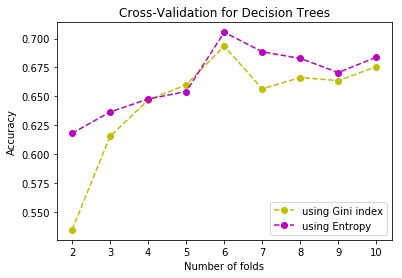

In [135]:
plt.plot(list(range(2,11)), accuracy_cv, 'yo--')
plt.plot(list(range(2,11)), accuracy_cv2, 'mo--')
plt.title('Cross-Validation for Decision Trees')
plt.xlabel('Number of folds')
plt.ylabel('Accuracy')
plt.legend(['using Gini index', 'using Entropy'], loc=4)
plt.show()